In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

In [3]:
df['Sport']=df.Sport.str.title()

In [4]:
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,NaN,Auto Racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


# How AVG top athletes' salaries were changing over time 

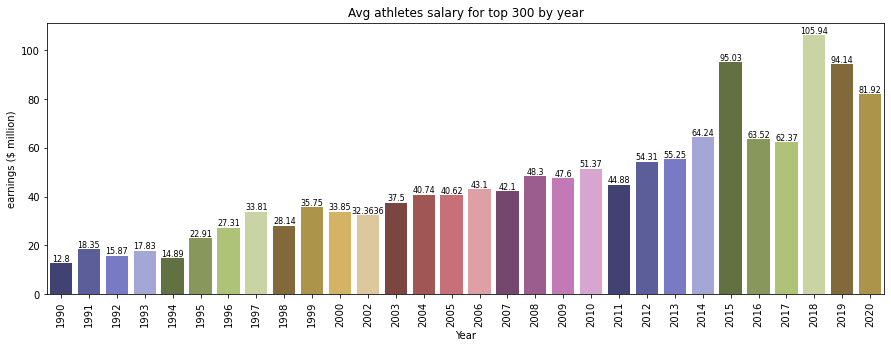

In [5]:
grouped=df.groupby('Year')['earnings ($ million)'].mean().reset_index().sort_values('Year',ascending=True)
grouped['Year']=grouped.Year.astype(str)

plt.figure(figsize=(15,5))
ax=sns.barplot(data=grouped,x='Year',y='earnings ($ million)',palette='tab20b')
plt.xticks(rotation=90)
plt.title('Avg athletes salary for top 300 by year')
plt.bar_label(ax.containers[0],size=8)
plt.show()

# Which country has most highest paid athletes 

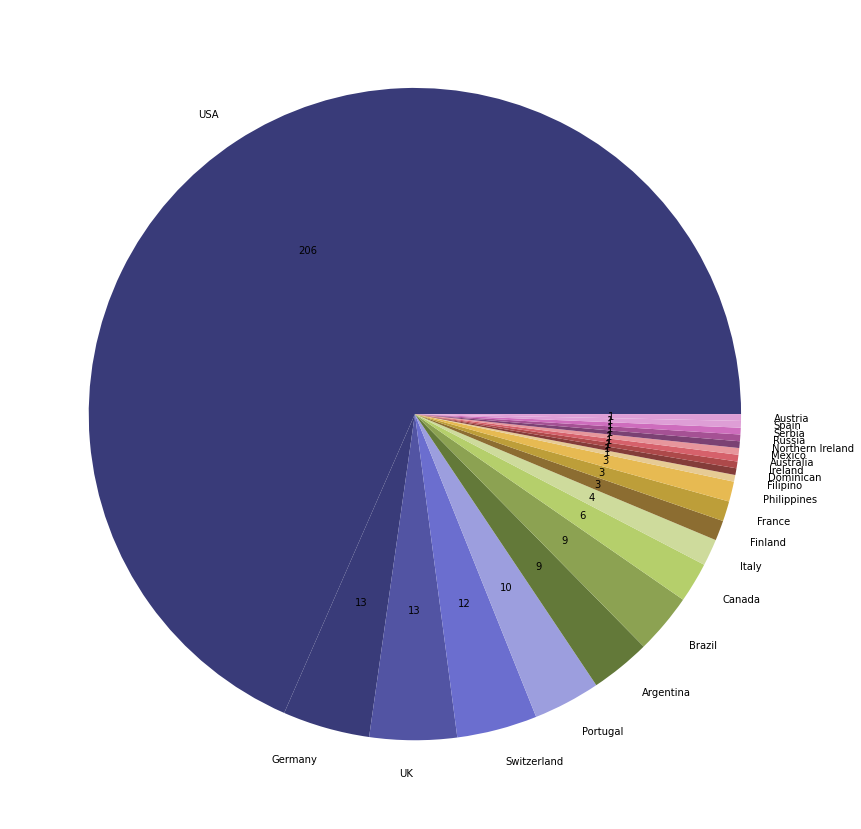

In [6]:
grouped=df.groupby('Nationality')['S.NO'].count().reset_index().sort_values('S.NO',ascending=False)
plt.figure(figsize=(15,15))
colors=list(plt.get_cmap('tab20b')(np.linspace(0,1,grouped.Nationality.nunique())))

plt.pie(x=grouped['S.NO'],labels=grouped['Nationality'], autopct= lambda x: '{:.0f}'.format(x*grouped['S.NO'].sum()/100),colors=colors)
plt.show()

# Find sports with highest income for each decade

In [7]:
decade_list=[]
for i in df['Year']:
    if i>=1990 and i<2000:
        decade_list.append('90s')
    elif i>=2000 and i<2010:
        decade_list.append("2000s")
    elif i>=2010 and i<2020:
        decade_list.append('2010s')
    elif i>=2020 and i<2030:
        decade_list.append('2020s')
    else:
        None
df['Decade']=decade_list 

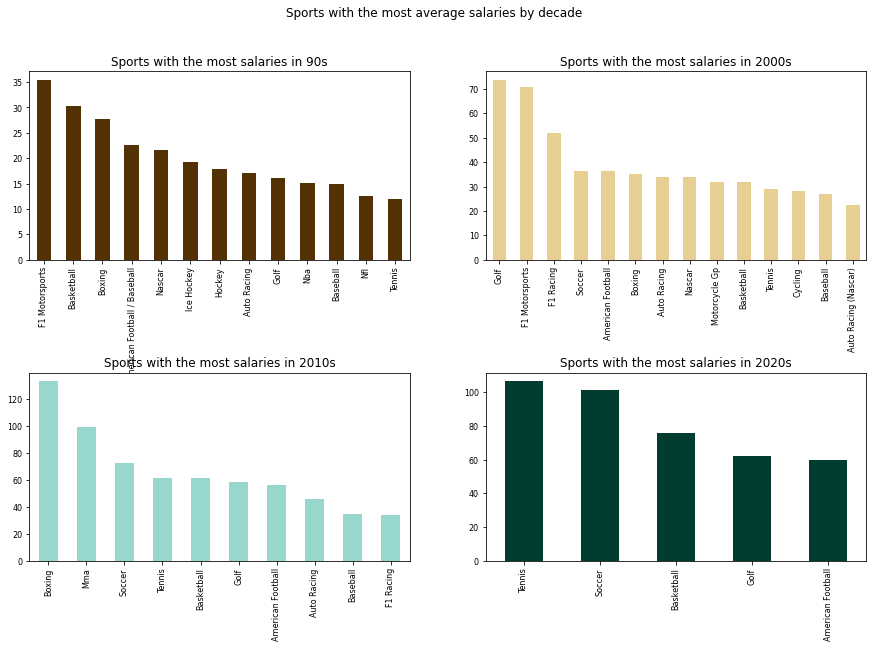

In [8]:
decades=df.Decade.unique()
fig,axes=plt.subplots(2,2,figsize=(15,9))
colors=list(plt.get_cmap('BrBG')(np.linspace(0,1,4)))

for decade,ax,color in zip(decades,axes.ravel(),colors):
    grouped=df[df.Decade==decade].groupby('Sport')['earnings ($ million)'].mean().reset_index().sort_values('earnings ($ million)',ascending=False)
    grouped.plot(kind='bar',ax=ax,x='Sport',y='earnings ($ million)',xlabel='',legend=False,fontsize=8,color=color)
    #sns.barplot(data=grouped,x='Sport',y='earnings ($ million)',ax=ax,palette='tab20b')
    ax.set_title('Sports with the most salaries in '+decade)
plt.suptitle('Sports with the most average salaries by decade')
plt.subplots_adjust(hspace=0.6)
plt.show()

# How average salaries were changing for each sport over time

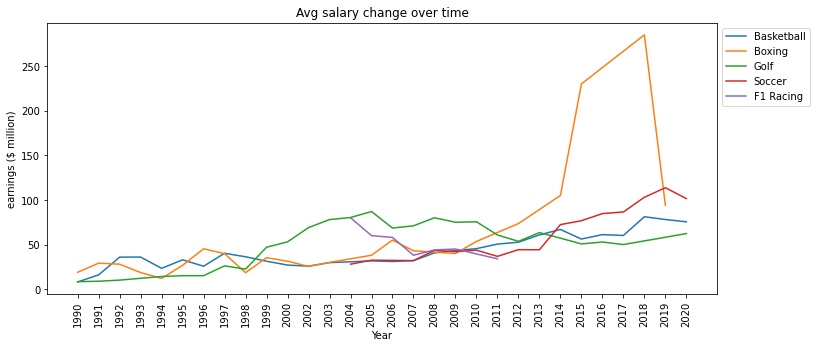

In [9]:
grouped=df.groupby(['Year','Sport'])['earnings ($ million)'].mean().reset_index().sort_values('Year')
grouped['Year']=grouped.Year.astype(str)

filter_legend=['Basketball','Soccer','Golf','Boxing','F1 Racing']
plt.figure(figsize=(12,5))
sns.lineplot(data=grouped[grouped.Sport.isin(filter_legend)],x='Year',y='earnings ($ million)',hue='Sport')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Avg salary change over time')
plt.xticks(rotation=90)
plt.show()

# Sportsmen with the most salaries since 1990  

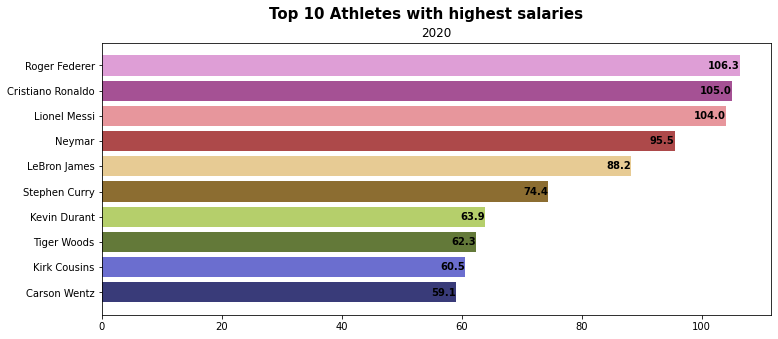

In [10]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


fig,ax=plt.subplots(figsize=(12,5))
colors=list(plt.get_cmap('tab20b')(np.linspace(0,1,10)))

def animation_bar(year):
    grouped=df[df.Year==year].sort_values('earnings ($ million)',ascending=True).tail(10)
    ax.clear()
    ax.barh(grouped['Name'],grouped['earnings ($ million)'],color=[color for color in colors])
    ax.set_title(str(year))
    def value_labels(y):
        for i in range(len(y)):
            plt.text(y.iloc[i],i,y.iloc[i],va='center',ha='right',fontweight='bold')
    value_labels(grouped['earnings ($ million)'])
    
plt.suptitle('Top 10 Athletes with highest salaries', size=15, fontweight='bold')
animator=animation.FuncAnimation(fig,animation_bar,frames=df.Year.unique(),interval=1000)
HTML(animator.to_jshtml())

# Visualize average salaries by sport and year 

In [11]:
pivoted=df.pivot_table(index='Sport',columns='Year',values='earnings ($ million)',aggfunc='mean',fill_value=0)

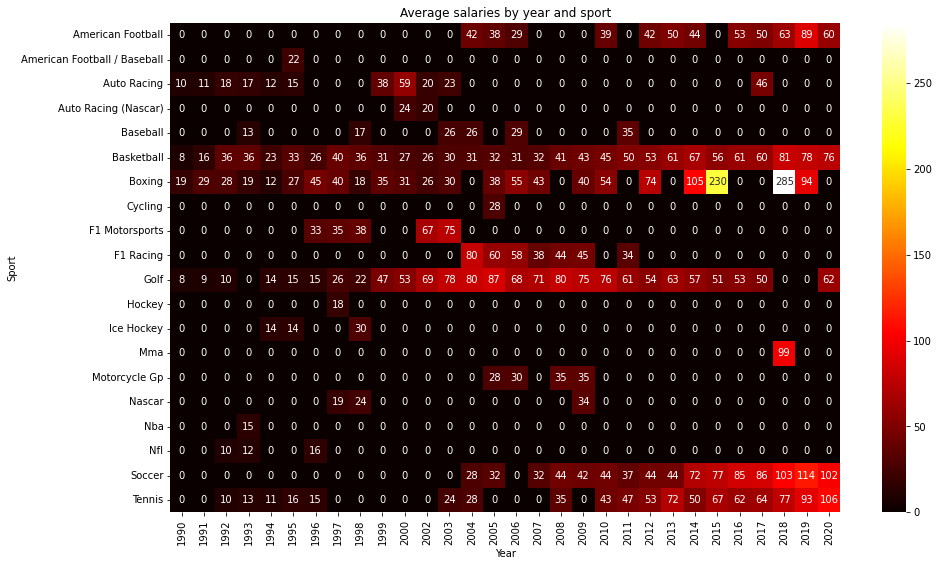

In [12]:
plt.figure(figsize=(15,9))
sns.heatmap(pivoted,annot=True,fmt='.0f',cmap='hot')
plt.title('Average salaries by year and sport')
plt.yticks(rotation=0)
plt.show()

In [13]:
### F1 Racing used to be one of the highest-salary sport in 2010s and Auto Racing  during 90s and in the begining of 2000s.
### Now the highest-salary sports are American Football, Basketball, Boxing,Gold,Soccer,Tennis